# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


In [38]:
response = requests.get(f'http://api.openweathermap.org/geo/1.0/direct?q={cities[1]}&appid={weather_api_key}')
response.json()[0]['lat']

60.7922222

In [ ]:
response = requests.get(f'https://api.openweathermap.org/data/2.5/weather?q={cities[1]}&appid={weather_api_key}').json()
response

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ondjiva
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | melekeok village
Processing Record 11 of Set 1 | salamanca
Processing Record 12 of Set 1 | strelka
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | palmer
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | port saint john's
Processing Record 18 of Set 1 | ribadesella
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | nandigama
Processing Record 21 of Set 1 | meridian
Processing Record 22 of Se

Processing Record 36 of Set 4 | pandan
Processing Record 37 of Set 4 | saipan
Processing Record 38 of Set 4 | bhisho
Processing Record 39 of Set 4 | tianshui
Processing Record 40 of Set 4 | mersa matruh
Processing Record 41 of Set 4 | dudinka
Processing Record 42 of Set 4 | suez
Processing Record 43 of Set 4 | isla vista
Processing Record 44 of Set 4 | budva
Processing Record 45 of Set 4 | senador jose porfirio
Processing Record 46 of Set 4 | lushun
Processing Record 47 of Set 4 | kailua-kona
Processing Record 48 of Set 4 | smithers
Processing Record 49 of Set 4 | labrador city
Processing Record 0 of Set 5 | temiskaming shores
Processing Record 1 of Set 5 | champerico
Processing Record 2 of Set 5 | thompson
Processing Record 3 of Set 5 | kwale
Processing Record 4 of Set 5 | leua
Processing Record 5 of Set 5 | howrah
Processing Record 6 of Set 5 | vorgashor
Processing Record 7 of Set 5 | satsuma
Processing Record 8 of Set 5 | nantucket
Processing Record 9 of Set 5 | carnarvon
Processing

Processing Record 30 of Set 8 | bodaybo
Processing Record 31 of Set 8 | san juan de miraflores
Processing Record 32 of Set 8 | reggane
Processing Record 33 of Set 8 | inhambane
Processing Record 34 of Set 8 | ouellah
City not found. Skipping...
Processing Record 35 of Set 8 | port blair
Processing Record 36 of Set 8 | fuglafjordur
Processing Record 37 of Set 8 | hanzhong
Processing Record 38 of Set 8 | santa cruz
Processing Record 39 of Set 8 | saratamata
City not found. Skipping...
Processing Record 40 of Set 8 | katsuura
Processing Record 41 of Set 8 | mokhsogollokh
Processing Record 42 of Set 8 | jisr ez zarqa
City not found. Skipping...
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | malir cantonment
City not found. Skipping...
Processing Record 45 of Set 8 | weno
Processing Record 46 of Set 8 | dourbali
Processing Record 47 of Set 8 | mocimboa
Processing Record 48 of Set 8 | tabou
Processing Record 49 of Set 8 | mount gambier
Processing Record 0 of Set

Processing Record 16 of Set 12 | inverell
Processing Record 17 of Set 12 | myeik
Processing Record 18 of Set 12 | baruun-urt
Processing Record 19 of Set 12 | pahrump
Processing Record 20 of Set 12 | mineros
Processing Record 21 of Set 12 | oodweyne
Processing Record 22 of Set 12 | pasargad
City not found. Skipping...
Processing Record 23 of Set 12 | yokadouma
Processing Record 24 of Set 12 | gunnison
Processing Record 25 of Set 12 | pucon
Processing Record 26 of Set 12 | saudarkrokur
Processing Record 27 of Set 12 | vung tau
Processing Record 28 of Set 12 | skutskar
City not found. Skipping...
Processing Record 29 of Set 12 | cole harbour
Processing Record 30 of Set 12 | pieksamaki
Processing Record 31 of Set 12 | devils lake
Processing Record 32 of Set 12 | san antonio de pale
Processing Record 33 of Set 12 | bamboo flat
Processing Record 34 of Set 12 | guatrache
Processing Record 35 of Set 12 | luza
Processing Record 36 of Set 12 | ta`u
Processing Record 37 of Set 12 | zyryanovsk
Pro

In [59]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df = pd.DataFrame({'City':city_data['City'], "Lat":city_data['Lat'], "Lng":city_data['Lng'], 'Max Temp':city_data['Max Temp'], "Humidity":city_data['Humidity'], 'Cloudiness':city_data['Cloudiness'], 'Wind Speed':city_data["Wind Speed"], 'Country':city_data['Country'], "Date":city_data['Date']})
city_data_df = pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ondjiva,-17.0667,15.7333,62.64,29,100,2.30,AO,1688064416
1,bethel,41.3712,-73.4140,80.85,62,20,5.75,US,1688064209
2,blackmans bay,-43.0167,147.3167,50.13,74,63,15.66,AU,1688064417
3,grytviken,-54.2811,-36.5092,21.42,77,18,10.07,GS,1688064417
4,broome,42.2506,-75.8330,81.01,57,100,5.75,US,1688064418


In [63]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ondjiva,-17.0667,15.7333,62.64,29,100,2.30,AO,1688064416
1,bethel,41.3712,-73.4140,80.85,62,20,5.75,US,1688064209
2,blackmans bay,-43.0167,147.3167,50.13,74,63,15.66,AU,1688064417
3,grytviken,-54.2811,-36.5092,21.42,77,18,10.07,GS,1688064417
4,broome,42.2506,-75.8330,81.01,57,100,5.75,US,1688064418


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

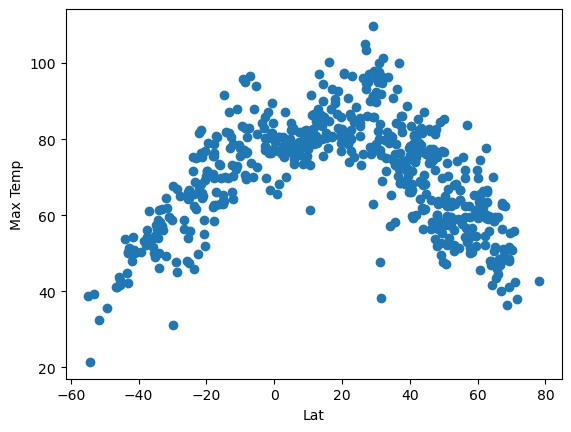

In [68]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Lat')
plt.ylabel('Max Temp')


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

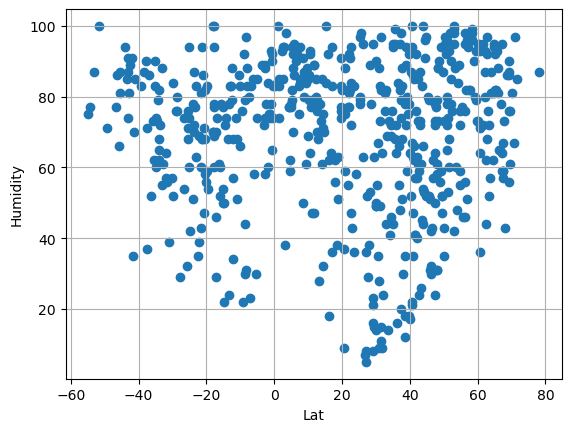

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

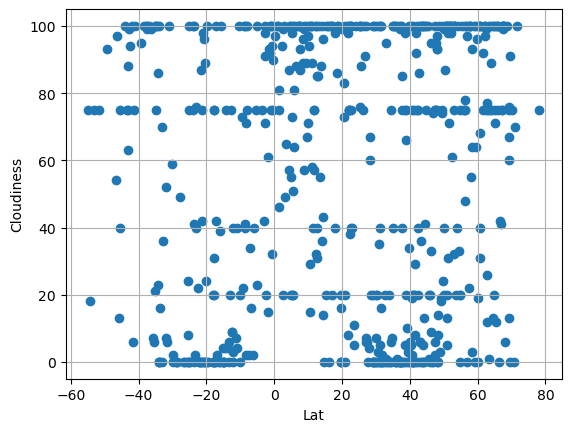

In [71]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

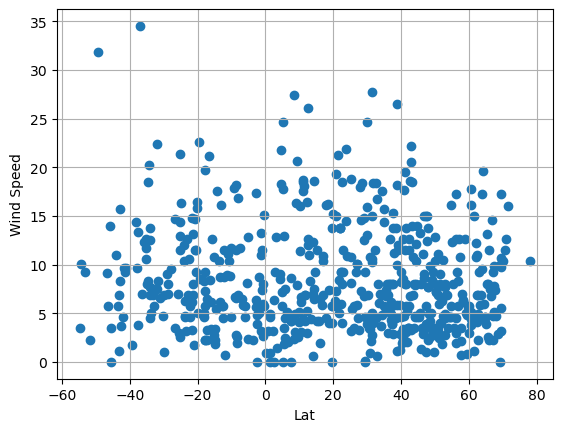

In [72]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots

#xv = volume['Weight (g)']
#yv = volume['Tumor Volume (mm3)']
#df = whole df
#xn = x name
#yn = y name

def regres(xv,yv,df,xn,yn):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xv, yv)
    
    regress_values = xv * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    df.plot.scatter(x=xn, y=yn)
    plt.plot(xv,regress_values,"r-")
    print(slope)
    plt.show

    
    




In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,80.85,62,20,5.75,US,1688064209
4,broome,42.2506,-75.8330,81.01,57,100,5.75,US,1688064418
5,olonkinbyen,70.9221,-8.7187,42.39,97,70,12.64,SJ,1688064418
6,anadyr,64.7500,177.4833,50.50,81,20,4.47,RU,1688064418
9,melekeok village,7.4957,134.6367,75.76,94,100,0.00,PW,1688064419


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ondjiva,-17.0667,15.7333,62.64,29,100,2.30,AO,1688064416
2,blackmans bay,-43.0167,147.3167,50.13,74,63,15.66,AU,1688064417
3,grytviken,-54.2811,-36.5092,21.42,77,18,10.07,GS,1688064417
7,uturoa,-16.7333,-151.4333,80.53,74,2,21.16,PF,1688064419
8,waitangi,-43.9535,-176.5597,53.82,94,100,11.01,NZ,1688064419


###  Temperature vs. Latitude Linear Regression Plot

-0.492913198075262


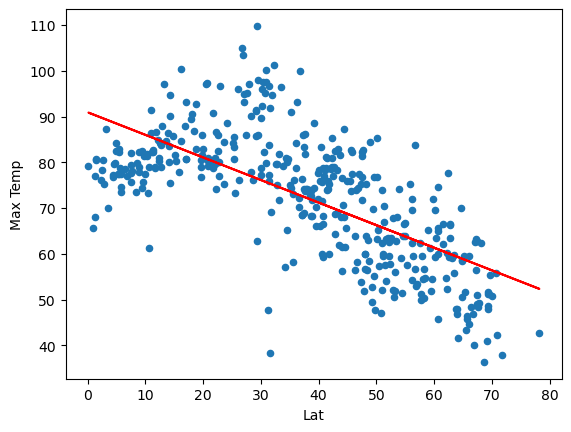

In [81]:
# Linear regression on Northern Hemisphere
regres(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],northern_hemi_df,'Lat','Max Temp')

0.8848401914314716


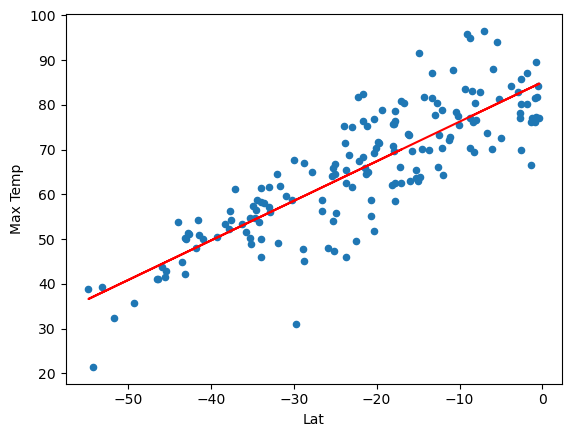

In [82]:
# Linear regression on Southern Hemisphere
regres(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],southern_hemi_df,'Lat','Max Temp')

**Discussion about the linear relationship:** It seems very clear that the further you get from the equator the lower the max temp is.

### Humidity vs. Latitude Linear Regression Plot

0.030221866223612923


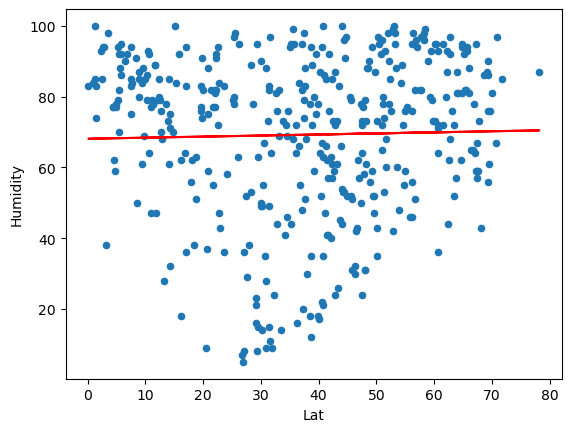

In [83]:
# Northern Hemisphere
regres(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],northern_hemi_df,'Lat','Humidity')

-0.12807255510543583


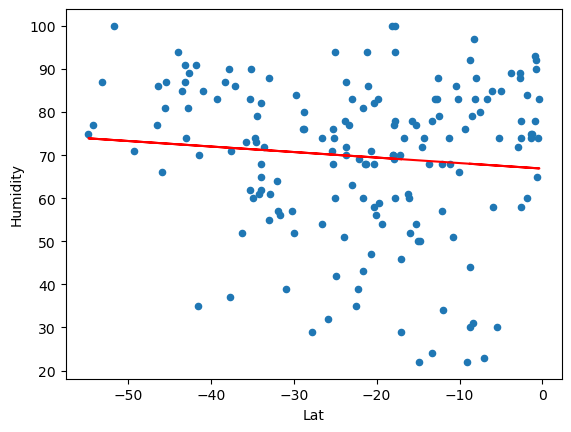

In [84]:
# Southern Hemisphere
regres(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],southern_hemi_df,'Lat','Humidity')

**Discussion about the linear relationship:** While the relationship between max temp and lat was close it seems there is only a slight decrease in humity as you aproach the equator with lots of outliers.

### Cloudiness vs. Latitude Linear Regression Plot

-0.07482134211999066


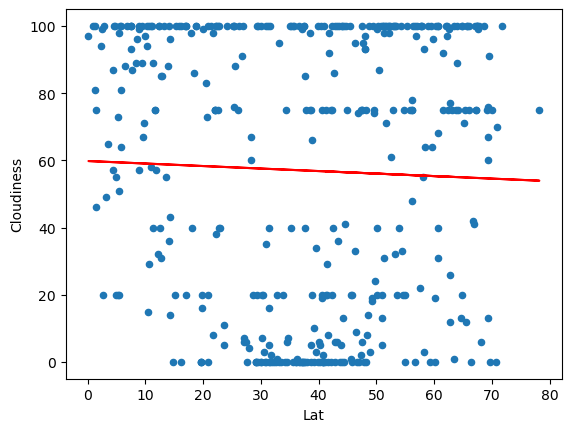

In [86]:
# Northern Hemisphere
regres(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],northern_hemi_df,'Lat','Cloudiness')

-0.292369981598798


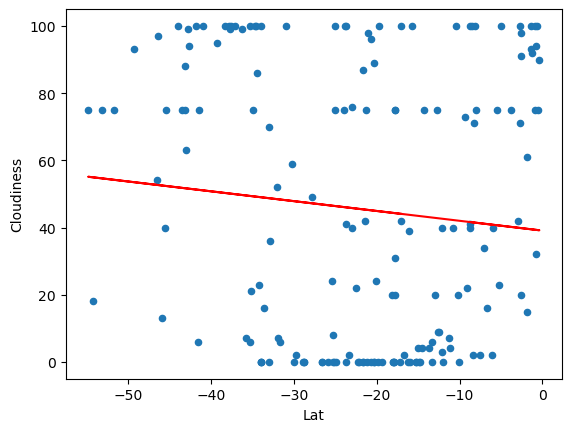

In [85]:
# Southern Hemisphere
regres(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],southern_hemi_df,'Lat','Cloudiness')

**Discussion about the linear relationship:** My data seems to show that the further north you go in general there is a lack of clouds. This may be because it is summer for the norther hemesphere and extreem latitudes due not outway the tilt of the earth

### Wind Speed vs. Latitude Linear Regression Plot

-0.023614055406785236


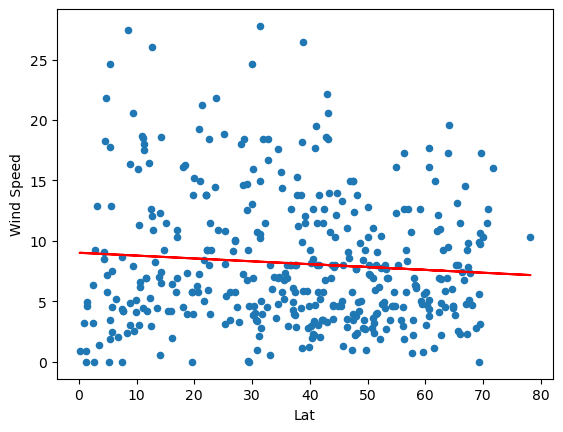

In [88]:
# Northern Hemisphere
regres(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],northern_hemi_df,'Lat','Wind Speed')

-0.04510998291818641


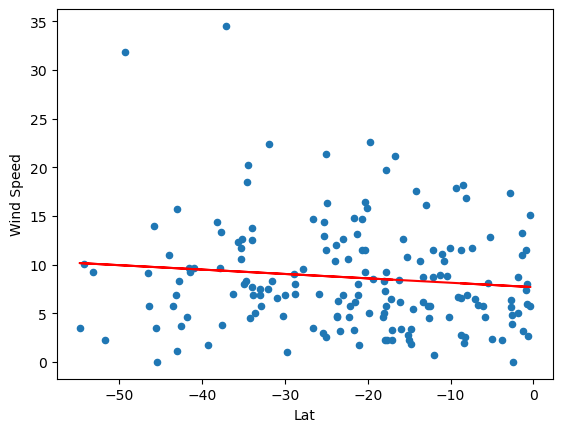

In [87]:
# Southern Hemisphere
regres(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],southern_hemi_df,'Lat','Wind Speed')

**Discussion about the linear relationship:** It apears the further north you go there is a general decrease in wind speed maybe due to the summer season